In [3]:
%pip install pandas matplotlib

  Using cached pandas-2.2.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (19 kB)
  Using cached matplotlib-3.9.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached numpy-2.1.1-cp311-cp311-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.7-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-10.4.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
Using cached pandas-2.2.2-cp311-cp311-macosx_11_0_arm64.whl (11.3 MB)
Using cached matplotlib-3.9.2-cp311-cp311-macosx_11_0_arm64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp311-cp311-macosx_11_0_arm64.whl (250 kB)
Using cached cy

In [4]:
import pandas as pd

df = pd.read_csv('game_logs.csv')

df

,Score,Start Time,End Time,Duration
0,32,2024-09-17T13:27:13.779658,2024-09-17T13:27:14.921129,0:00:01.141471
1,33,2024-09-17T13:27:13.779658,2024-09-17T13:27:16.030868,0:00:02.251210
2,33,2024-09-17T13:27:13.779658,2024-09-17T13:27:17.146154,0:00:03.366496
3,34,2024-09-17T13:27:13.779658,2024-09-17T13:27:18.299127,0:00:04.519469
4,36,2024-09-17T13:27:13.779658,2024-09-17T13:27:19.521289,0:00:05.741631
...,...,...,...,...
150,62,2024-09-17T13:27:13.779658,2024-09-17T13:32:25.895652,0:05:12.115994
151,62,2024-09-17T13:27:13.779658,2024-09-17T13:32:27.997927,0:05:14.218269
152,53,2024-09-17T13:27:13.779658,2024-09-17T13:32:29.792391,0:05:16.012733
153,55,2024-09-17T13:27:13.779658,2024-09-17T13:32:31.655673,0:05:17.876015


/var/folders/bk/wtgvpwpn77v7qf6gl8xh8lfw0000gn/T/ipykernel_20294/2824376016.py:33: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(df['Start Time'].min(), df['Start Time'].max())


AttributeError: module 'matplotlib.pyplot' has no attribute 'DateFormatter'

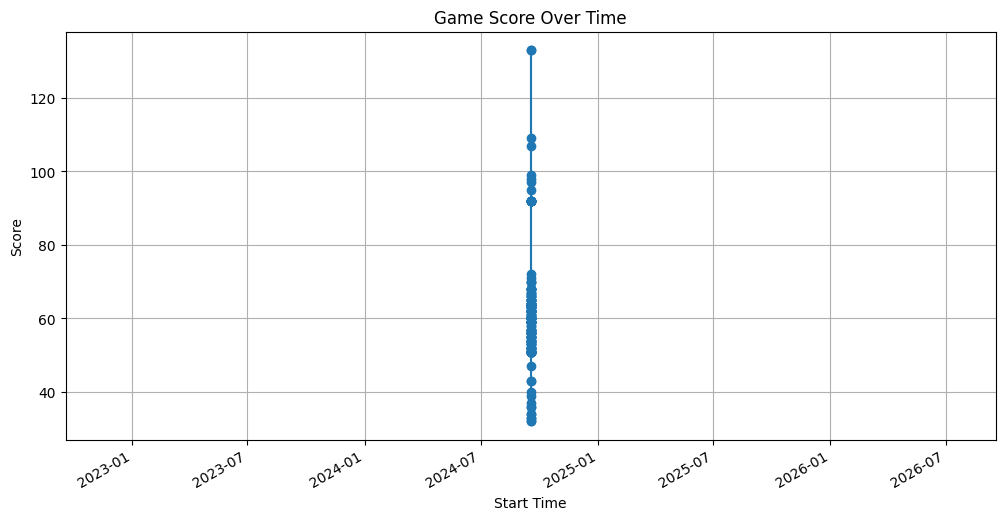

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import time

plt.ion()  # Turn on interactive mode

fig, ax = plt.subplots(figsize=(12, 6))
line, = ax.plot([], [], marker='o')

ax.set_title('Game Score Over Time')
ax.set_xlabel('Start Time')
ax.set_ylabel('Score')
ax.grid(True)

plt.gcf().autofmt_xdate()  # Rotate and align the tick labels

while True:
    # Read the CSV file
    df = pd.read_csv('game_logs.csv')

    # Convert 'Start Time' to datetime
    df['Start Time'] = pd.to_datetime(df['Start Time'])

    # Sort the dataframe by 'Start Time'
    df = df.sort_values('Start Time')

    # Update the plot data
    line.set_xdata(df['Start Time'])
    line.set_ydata(df['Score'])

    # Adjust the plot limits
    ax.set_xlim(df['Start Time'].min(), df['Start Time'].max())
    ax.set_ylim(df['Score'].min() - 5, df['Score'].max() + 5)

    # Update x-axis formatter
    ax.xaxis.set_major_formatter(plt.DateFormatter('%Y-%m-%d %H:%M:%S'))

    # Redraw the plot
    fig.canvas.draw()
    fig.canvas.flush_events()

    # Wait for 2 seconds before the next update
    time.sleep(2)
